# Project 5 Investment cycles
### Authors Piotr Snopek Jakub Caputa

Y - national income
R - interest

In [4]:
from scipy.integrate import odeint

In [5]:
%matplotlib inline

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 100

In [6]:
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

# Keyness model

In [4]:
def main(l0, l1, l2, l_s, alfa, beta1, beta2, beta3, beta, K, a1): 
    def I(y, r):
          return (l0 * K) / (l0 + (K - l0) * math.exp(-a1 * y))

    def S(y, r):
      return l1 * y + beta2 * r

    def L(y, r):
      return l2 * y - beta3 * r

    def f1(y, r):
      return I(y, r) - l1 * y - r * y * (beta1 + beta2)

    def f2(y, r):
      return r * (l2 * y - r * beta3 - l_s)

    def keynesian_model(params, t):
      y = params[0]
      r = params[1]
      dydt = f1(y, r) * alfa
      drdt = f2(y, r) * beta

      return [dydt, drdt]
    
    
    # initial condition
    params = [1.0, 0.1]

    # number of time points
    end = 1000

    # time points
    t = np.linspace(0, 100, end)

    # store solution
    y = np.empty_like(t)
    r = np.empty_like(t)
    Idt = np.empty_like(t)
    Sdt = np.empty_like(t)
    Ldt = np.empty_like(t)
    Mdt = np.empty_like(t)

    # record initial conditions
    y[0] = params[0]
    r[0] = params[1]
    Idt[0] = I(y[0], r[0])
    Sdt[0] = S(y[0], r[0])
    Ldt[0] = L(y[0], r[0])
    Mdt[0] = L(y[0], r[0]) - f2(y[0], r[0])

    # solve ODE
    for i in range(1, end):
        # span for next time step
        tspan = [t[i-1],t[i]]
        # solve for next step
        z = odeint(keynesian_model, params, tspan)
        # store solution for plotting
        y[i] = z[1][0]
        r[i] = z[1][1]
        Idt[i] = I(y[i], r[i])
        Sdt[i] = S(y[i], r[i])
        Ldt[i] = L(y[i], r[i])
        Mdt[i] = Ldt[i] - f2(y[i], r[i])
        # next initial condition
        params = z[1]
    
    T = 1000
    time = np.linspace(0, T, T)

    fig, ax = plt.subplots(figsize=(15, 10))

# uncomment this lines if you want to add additional information about the model    
    ax.plot(t, Idt, 'b-', label='I(t)')
    ax.plot(t, Sdt, 'r-', label='S(t)')
    ax.plot(t, Ldt, 'g-', label='L(t)')
    ax.plot(t, Mdt, 'y--', label='M(t)')
    ax.legend(loc='best', prop={'size': 15})
    plt.show()

interact(main, alfa=FloatSlider(min=0, max=10, step=0.01, value=2, description='alfa', style=style, layout=slider_layout),
               beta=FloatSlider(min=0, max=10, step=0.01, value=7, description='beta', style=style, layout=slider_layout),
               l0=FloatSlider(min=0, max=0.1, step=0.001, value=0.005, description='l0', style=style, layout=slider_layout),
               l1=FloatSlider(min=0, max=3, step=0.01, value=0.0, description='l1', style=style, layout=slider_layout),
               l2=FloatSlider(min=0, max=3, step=0.01, value=0.35, description='l2', style=style, layout=slider_layout),
               l_s=FloatSlider(min=0, max=1.5, step=0.01, value=0.2, description='l_s', style=style, layout=slider_layout),
               beta1=FloatSlider(min=0, max=2, step=0.01, value=1.6, description='beta1', style=style, layout=slider_layout),
               beta2=FloatSlider(min=0, max=1.5, step=0.01, value=0.4, description='beta2', style=style, layout=slider_layout),
               beta3=FloatSlider(min=0, max=1.5, step=0.01, value=1, description='beta3', style=style, layout=slider_layout),
               K=FloatSlider(min=0, max=10, step=0.01, value=1, description='K', style=style, layout=slider_layout),
               a1=FloatSlider(min=0, max=6, step=0.01, value=4, description='a1', style=style, layout=slider_layout)
         
        );

interactive(children=(FloatSlider(value=0.005, description='l0', layout=Layout(width='99%'), max=0.1, step=0.0…

# Model 9d

In [7]:
T = 150
t = np.linspace(0, T, T)

F = np.empty_like(t)
H = np.empty_like(t)
K = np.empty_like(t)
L = np.empty_like(t)
M = np.empty_like(t)
p = np.empty_like(t)
w = np.empty_like(t)
G_INV = np.empty_like(t)
r = np.empty_like(t)

C = np.empty_like(t)
S = np.empty_like(t)
I = np.empty_like(t)
Div = np.empty_like(t)

def main(Q1, Q2, Q3, ALPHA_R,ALPHA_P,ALPHA_M,ALPHA_F,ALPHA_INV,T_WAGE,T_EMPL,A,LAMBDA,Y_SAVE,T_DEP,G_MAX,L_MAX): 
    def Model(params,t):
        F, M, H, K, L, p, w, G_INV, r = params
        if L_MAX < L:
            L_MAX_NEW = L
        else:
            L_MAX_NEW = L_MAX
    
        C = (1 - Y_SAVE * (1 + r)) * (1/p) * ALPHA_M * M # ok
        I = G_INV * (1/p) * ALPHA_F * F # ok
        D = C + I # ok
        Y = A * math.pow(L, LAMBDA) * math.pow(K, 1 - LAMBDA)
        Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
        Le = min(L_MAX_NEW, Ld)
        S = Y_SAVE * (1 + r) * ALPHA_M * M
        PI = p * D - w * L
        Div = ALPHA_F * F - p * I
        PIn = PI - (1 / T_DEP) * p * K

        # to jest ok
        dFdt = PI + S - Div - (p * I)
        dHdt = Y - D
        dKdt = (-1/T_DEP) * K  + I
        dLdt = (-1/T_EMPL) * (L - Le)
        dMdt = ((w * L) + Div) - ((p * C) + S)
        dpdt =  -1 * ((p * ALPHA_P * H)/D)

        dwdt = (w/T_WAGE) * (Ld - L)

        if PIn/(p * K) >= r:
            dG_INVdt = ALPHA_INV * (G_MAX - G_INV) * ( ( PIn/(p * K) ) - r)
        else:
            dG_INVdt = ALPHA_INV * G_INV * ( ( PIn/(p * K) ) - r)

        drdt = ALPHA_R * r * (((w * L) + Div) - ((p * C ) + S))

        return dFdt, dMdt, dHdt, dKdt, dLdt , dpdt, dwdt, dG_INVdt, drdt
    
    # Starting Params
        

    F[0], M[0], H[0], K[0], L[0], p[0], w[0], G_INV[0], r[0] = \
                            37, 58, 0, 43.5, 163.6, 1.56, 0.19, 0.46, 0.025
    
    params = [F[0],M[0],H[0],K[0],L[0],p[0], w[0], G_INV[0],r[0]]

    
    C[0] = (1 - Y_SAVE * (1 + r[0])) * (1/p[0]) * ALPHA_M * M[0]
    S[0] = Y_SAVE * (1 + r[0]) * ALPHA_M * M[0]
    I[0] = G_INV[0] * (1/p[0]) * ALPHA_F * F[0]
    Div[0] = ALPHA_F * F[0] - p[0] * I[0]
    
    for i in range(1, T):
        tspan = [t[i-1],t[i]]
        result = odeint(Model, params, tspan)
        F[i], M[i], H[i], K[i], L[i] , p[i], w[i], G_INV[i], r[i] = result[1]
        
        C[i] = ((1 - Y_SAVE * (1 + r[i])) * (1/p[i]) * ALPHA_M * M[i])
        S[i] = (Y_SAVE * (1 + r[i]) * ALPHA_M * M[i])
        I[i] = (G_INV[i] * (1/p[i]) * ALPHA_F * F[i])
        Div[i] = (ALPHA_F * F[i] - p[i] * I[i])

        params = result[1]
        
    
    fig, ax = plt.subplots(figsize=(15, 9))

    ax.plot(t, F, label='F(t) Liquid assets of banks and firms ')
    ax.plot(t, M, label='M(t) Money holdings of consumers ')
    ax.plot(t, K, label='K(t) Capital')
    ax.plot(t, L, label='L(t) Number of employed')
    ax.plot(t, H, label='H(t) Commodity inventories') # zapasy towarów
    ax.plot(t, w*100, label='w(t) Mean wage') 
    ax.legend(loc='best', prop={'size': 15})
    ax.grid()
    plt.show()
    
    print('Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.')

    fig, ax = plt.subplots(figsize=(15, 9))
    ax.plot(t, G_INV, label='Ginv(t) Investment level')
    ax.plot(t, r, label='r(t) Interest')
    ax.plot(t, p, label='p(t) Price level')
    ax.legend(loc='best', prop={'size': 15})
    ax.grid()
    plt.show()
    
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.plot(t, C, label='C(t) Consumption')
    ax.plot(t, S, label='S(t) Savings')
    ax.plot(t, I, label='I(t) Investments')
    ax.plot(t, Div, label='Div(t) Dividends')
    ax.legend(loc='best', prop={'size': 15})
    ax.grid()
    plt.show()
    return r

interact(main, Q1=FloatSlider(min=0, max=100, step=0.5, value=95, description='Q1', style=style, layout=slider_layout),
               Q2=FloatSlider(min=0, max=100, step=0.5, value=95, description='Q2', style=style, layout=slider_layout),
               Q3=FloatSlider(min=0, max=100, step=0.5, value=82.635, description='Q3', style=style, layout=slider_layout),
               ALPHA_R=FloatSlider(min=0, max=3, step=0.01, value=0.1, description='ALPHA_R', style=style, layout=slider_layout),
               ALPHA_P=FloatSlider(min=0, max=1.5, step=0.01, value=0.036, description='ALPHA_P', style=style, layout=slider_layout),
               ALPHA_M=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='ALPHA_M', style=style, layout=slider_layout),
               ALPHA_F=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='ALPHA_F', style=style, layout=slider_layout),
               ALPHA_INV=FloatSlider(min=0, max=3, step=0.01, value=2, description='ALPHA_INV', style=style, layout=slider_layout),  
               T_WAGE=FloatSlider(min=0, max=1.5, step=0.01, value=0.1, description='T_WAGE', style=style, layout=slider_layout), 
               T_EMPL=FloatSlider(min=0, max=1.5, step=0.01, value=0.1, description='T_EMPL', style=style, layout=slider_layout),  
               A=FloatSlider(min=0, max=1.5, step=0.01, value=9.3 * 0.03, description='A', style=style, layout=slider_layout),  
               LAMBDA=FloatSlider(min=0, max=1, step=0.01, value=1, description='LAMBDA', style=style, layout=slider_layout),  
               Y_SAVE=FloatSlider(min=0, max=1.5, step=0.01, value=0.3, description='Y_SAVE', style=style, layout=slider_layout),  
               T_DEP=FloatSlider(min=0, max=6, step=0.01, value=5, description='T_DEP', style=style, layout=slider_layout),  
               G_MAX=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='G_MAX', style=style, layout=slider_layout),  
               L_MAX=FloatSlider(min=0, max=300, step=1, value=200, description='L_MAX', style=style, layout=slider_layout)
        );

interactive(children=(FloatSlider(value=95.0, description='Q1', layout=Layout(width='99%'), step=0.5, style=Sl…

In [1]:
!pip install SALib

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

In [9]:
problem = {
    'num_vars': 2,
    'names': ['ALPHA_R', 'ALPHA_P'],
    'bounds': [[0.0, 0.2],
               [0.0, 0.2]]
}

In [10]:
problem

{'num_vars': 2,
 'names': ['ALPHA_R', 'ALPHA_P'],
 'bounds': [[0.0, 0.2], [0.0, 0.2]]}

In [28]:
param_values = saltelli.sample(problem, 3)

D:\anaconda\lib\site-packages\SALib\sample\saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (3) is equal to `2^n`.
        
  warnings.warn(msg)


In [29]:
param_values

array([[0.01875, 0.09375],
       [0.09375, 0.09375],
       [0.01875, 0.13125],
       [0.01875, 0.13125],
       [0.09375, 0.09375],
       [0.09375, 0.13125],
       [0.11875, 0.19375],
       [0.19375, 0.19375],
       [0.11875, 0.03125],
       [0.11875, 0.03125],
       [0.19375, 0.19375],
       [0.19375, 0.03125],
       [0.16875, 0.04375],
       [0.04375, 0.04375],
       [0.16875, 0.18125],
       [0.16875, 0.18125],
       [0.04375, 0.04375],
       [0.04375, 0.18125]])

<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


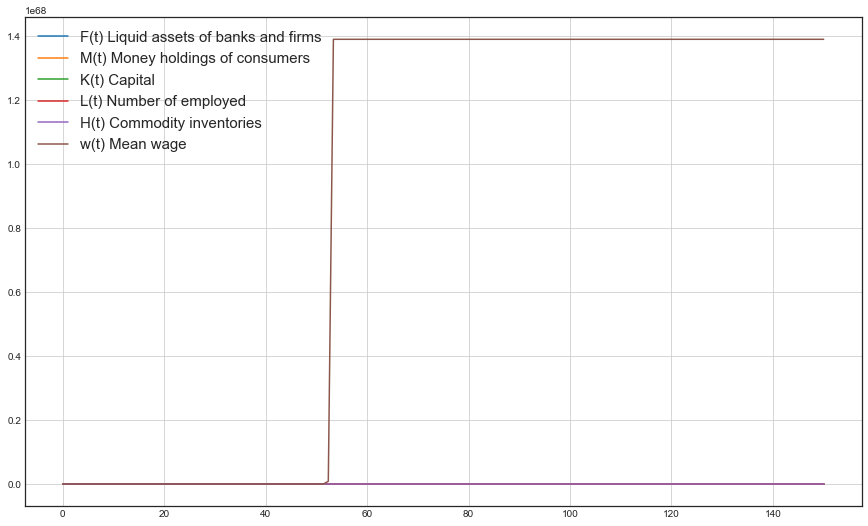

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


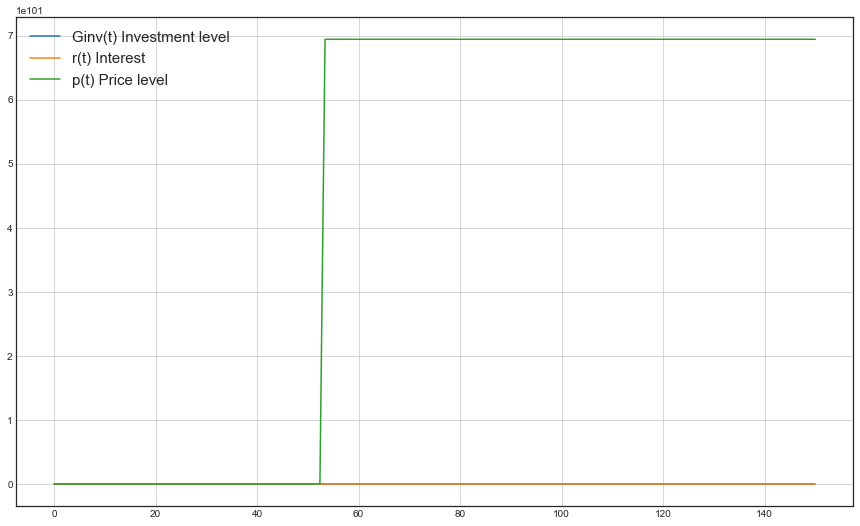

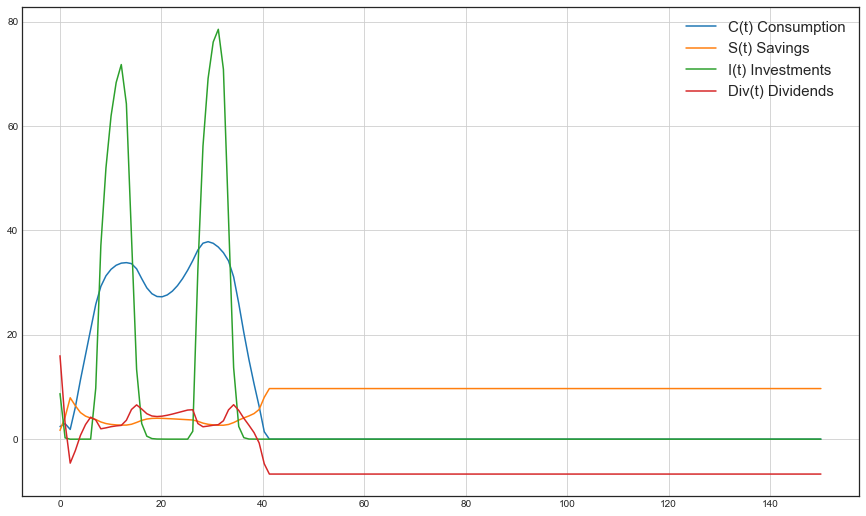

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


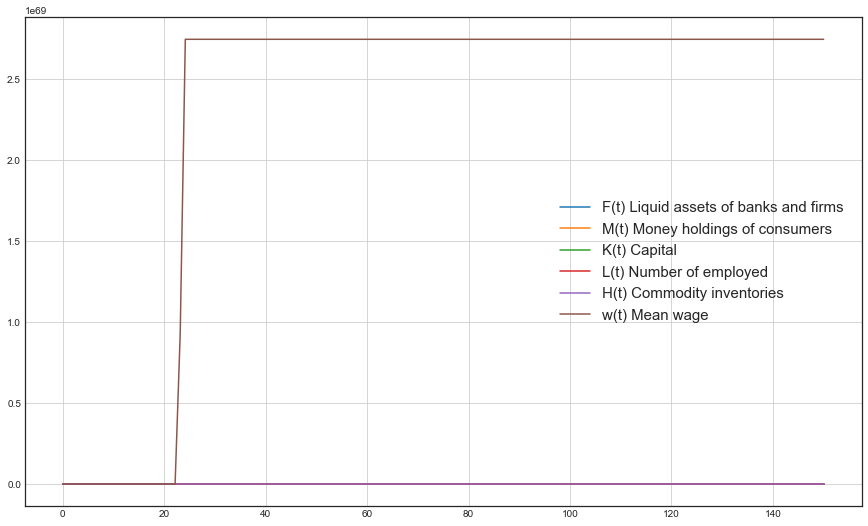

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


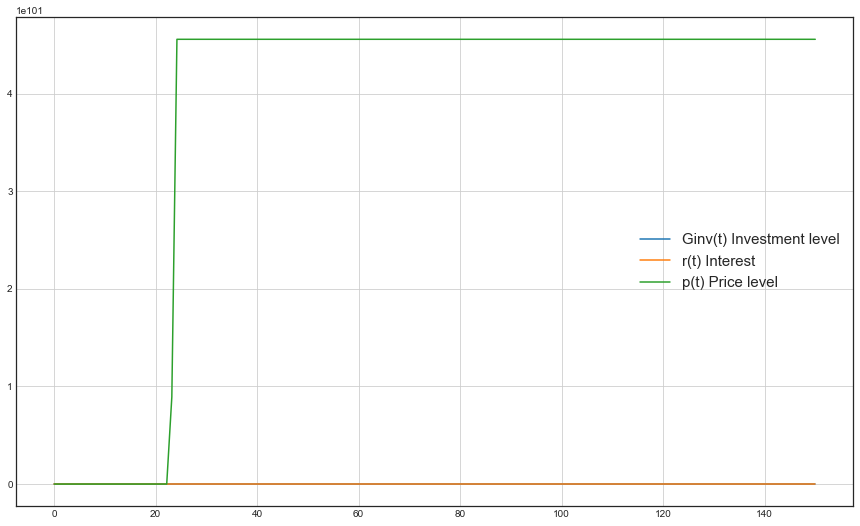

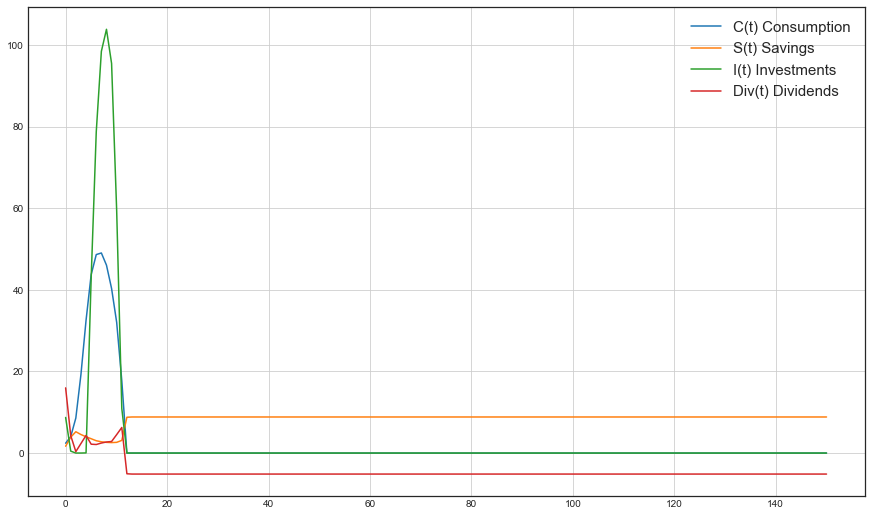

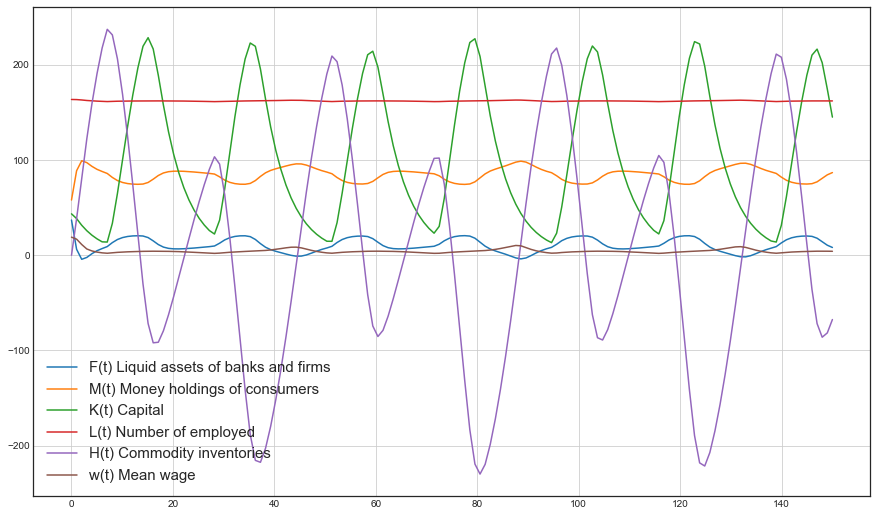

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


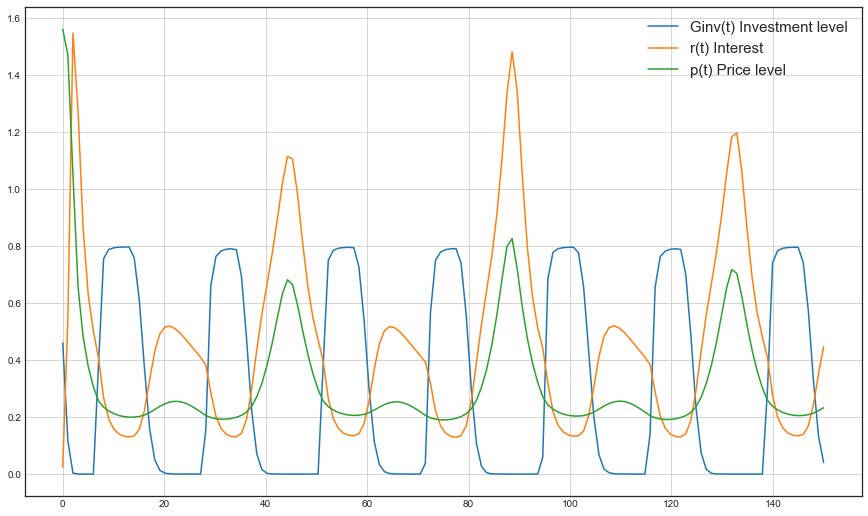

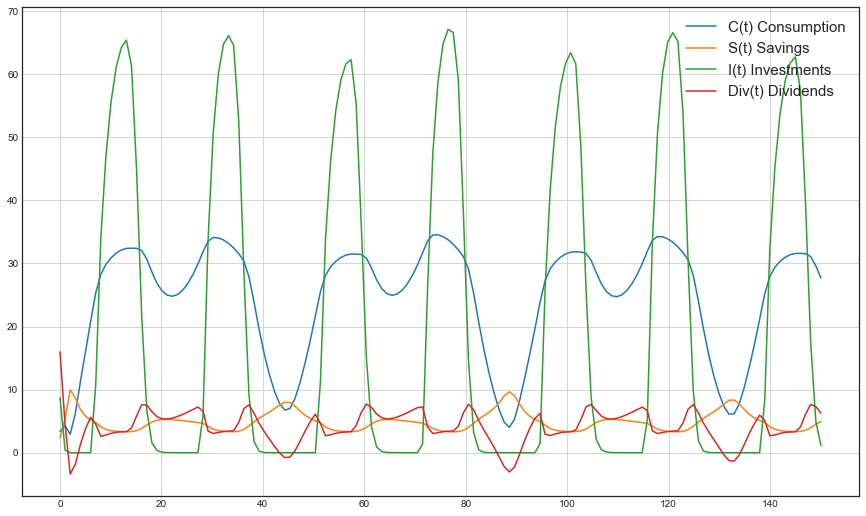

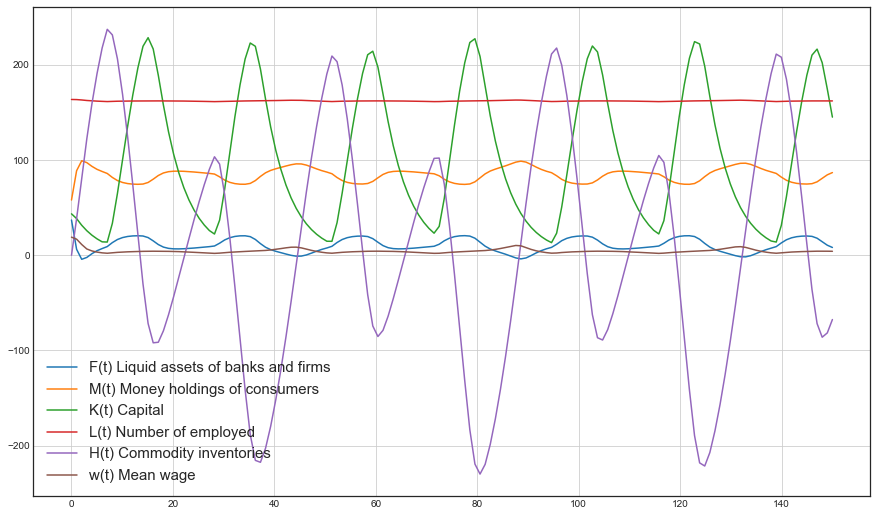

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


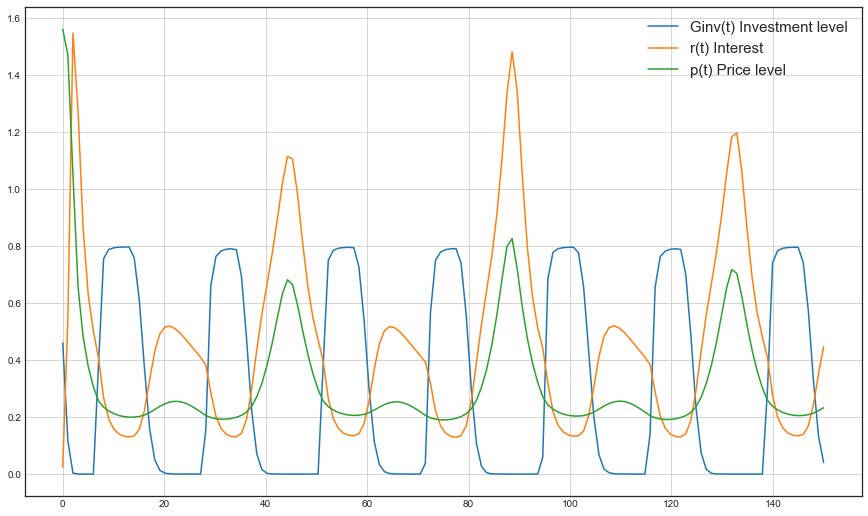

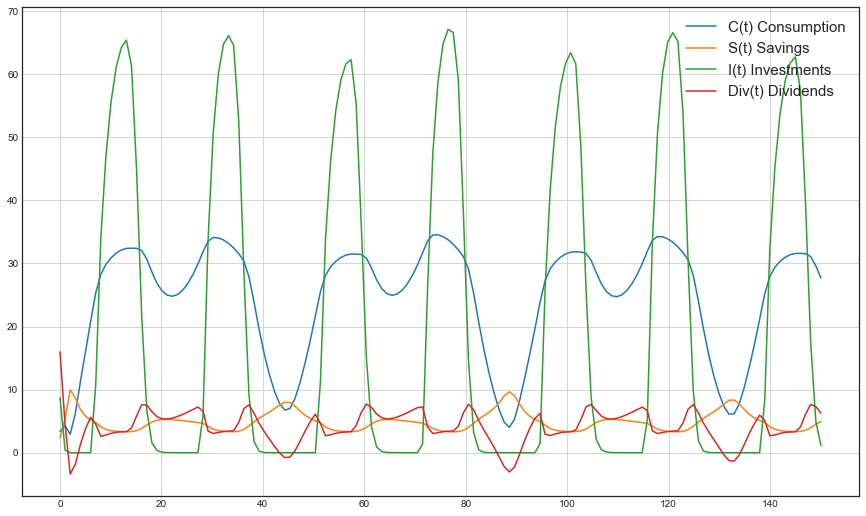

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


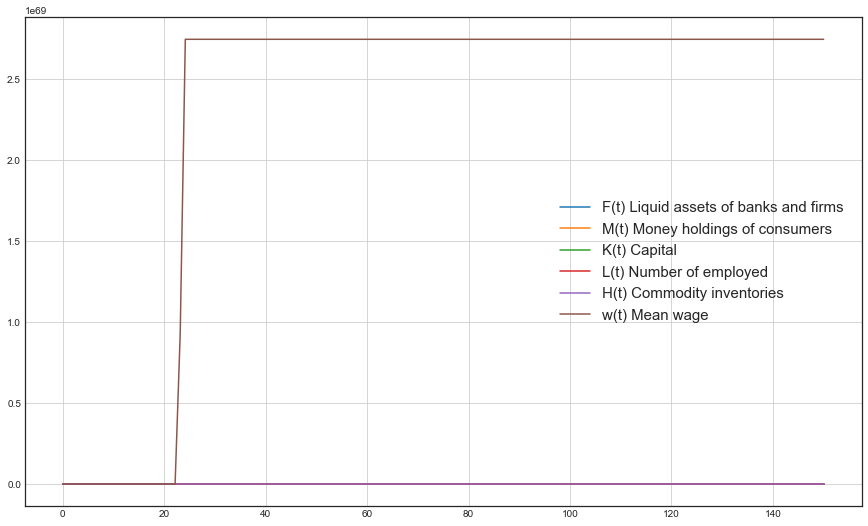

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


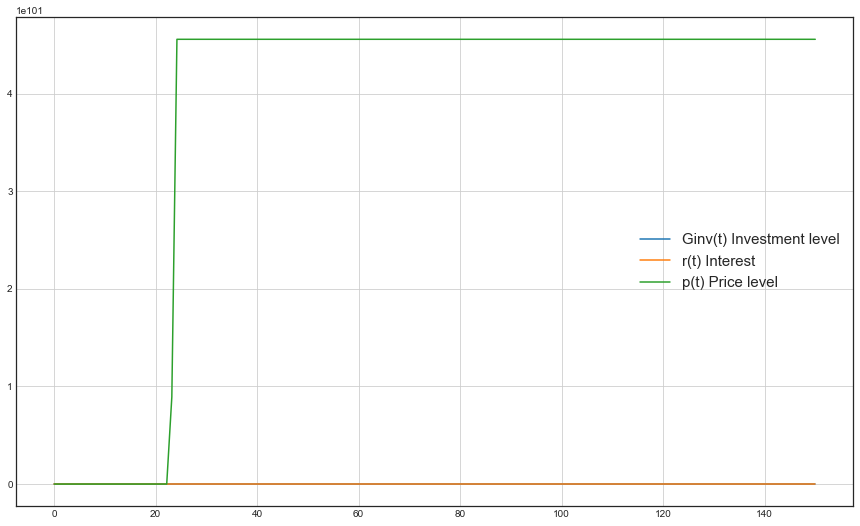

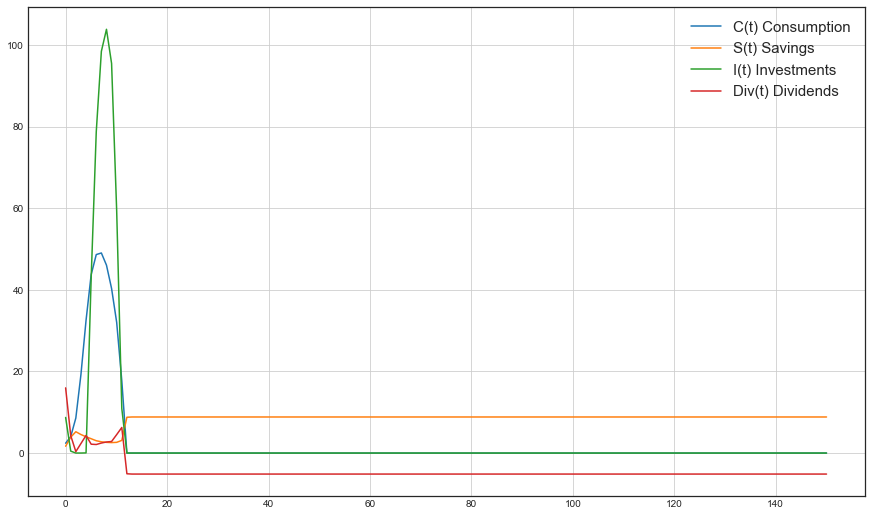

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


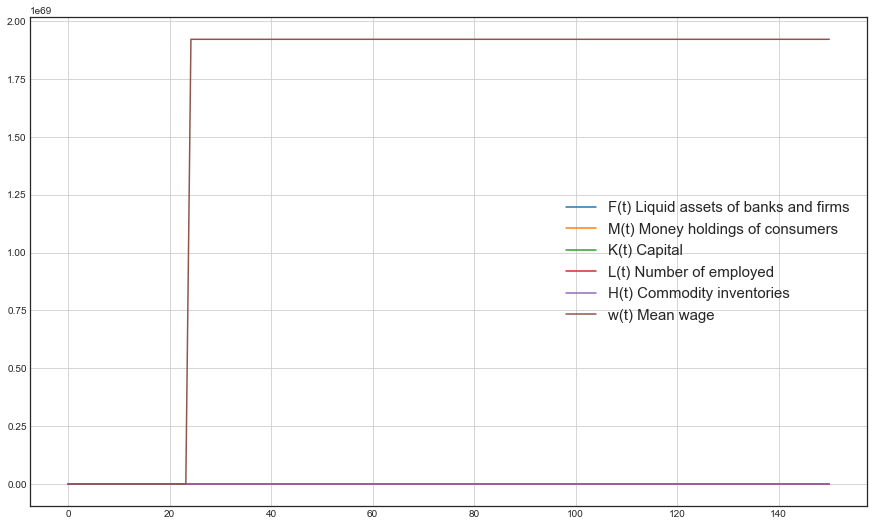

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


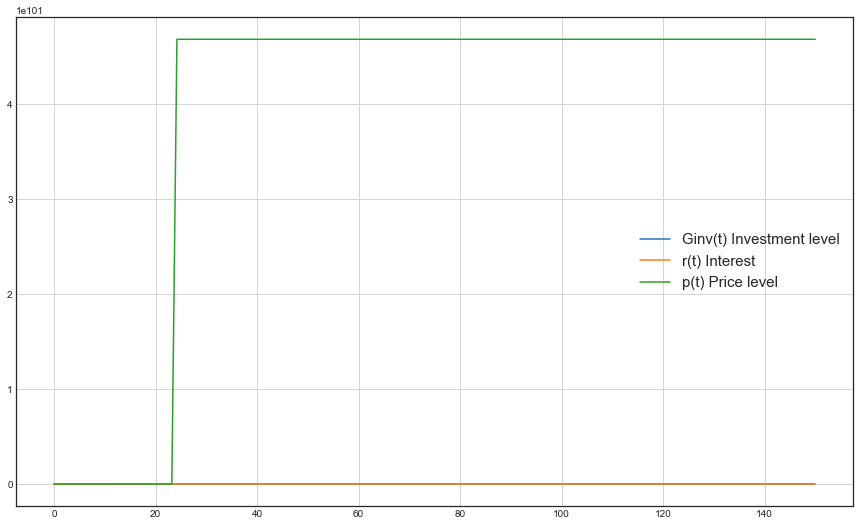

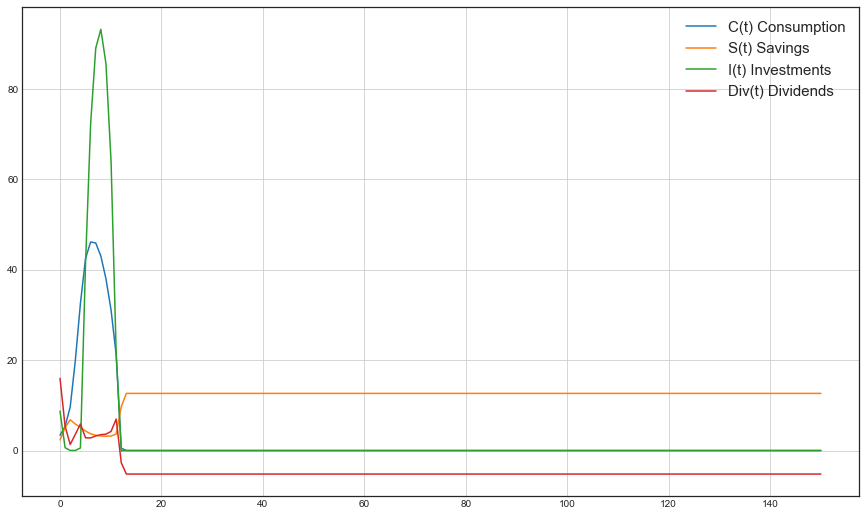

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


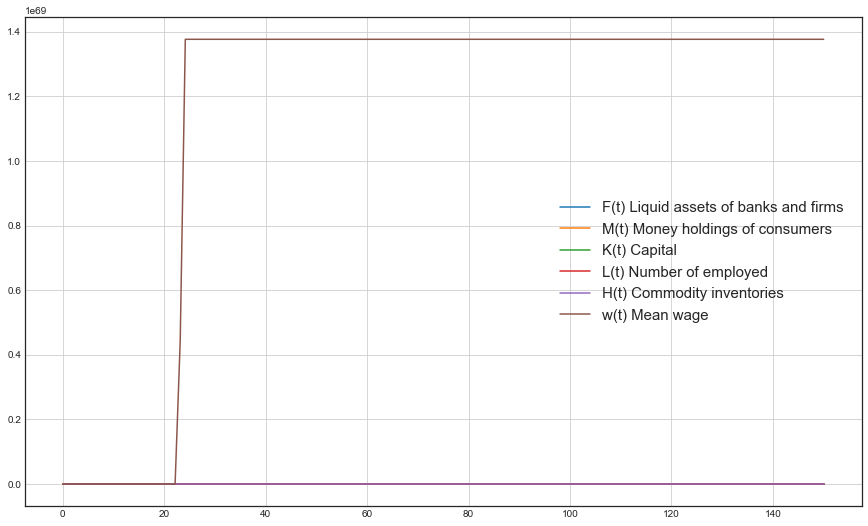

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


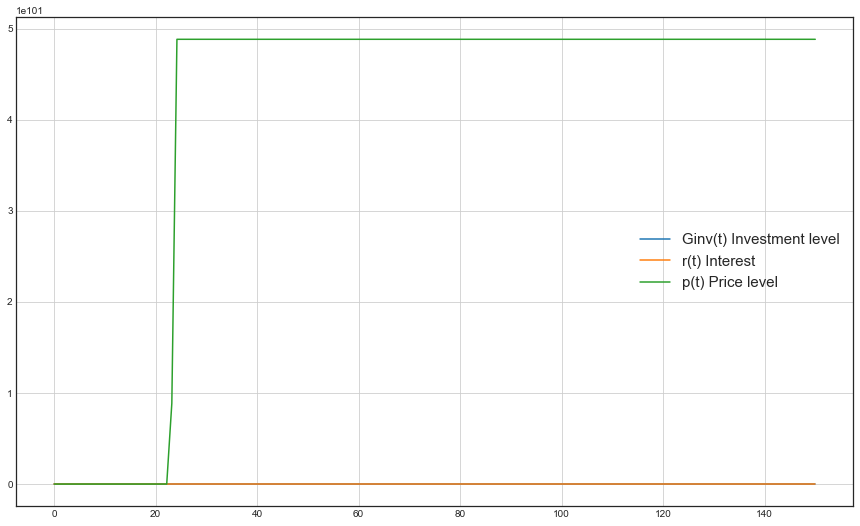

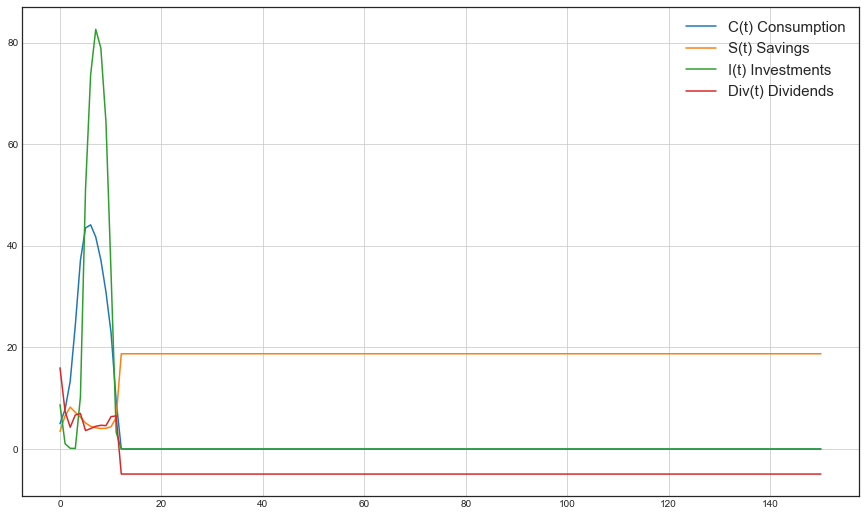

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


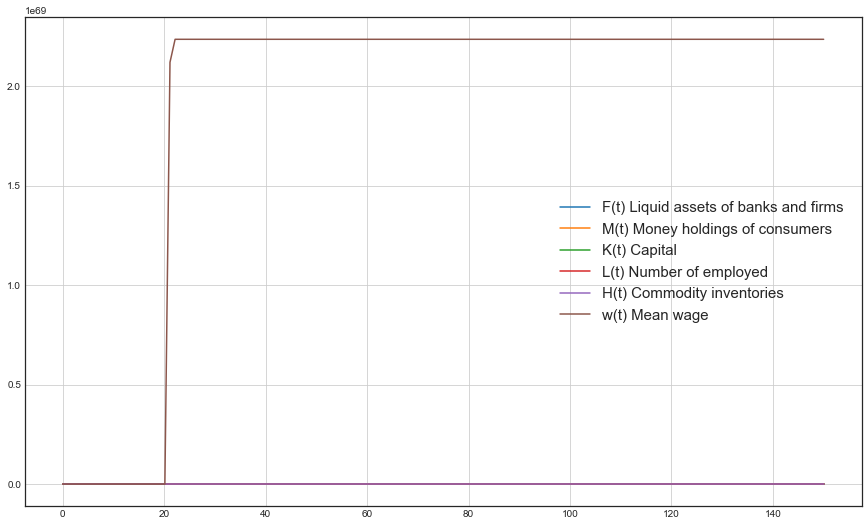

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


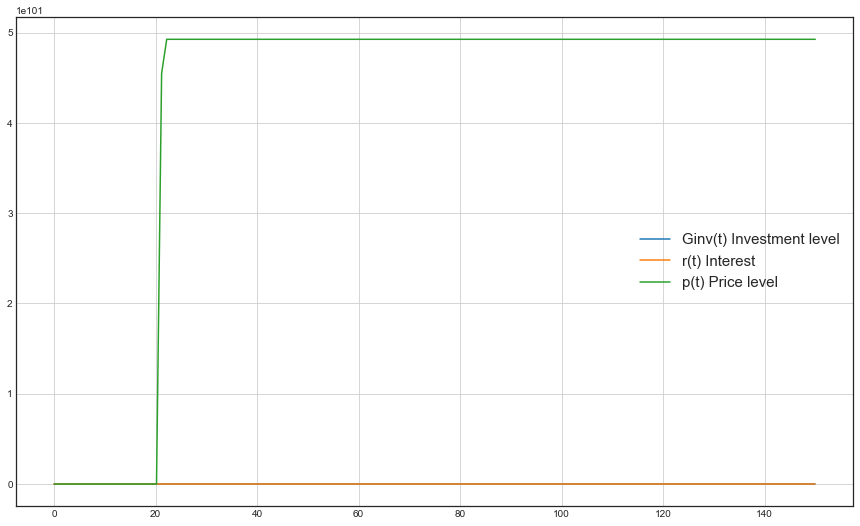

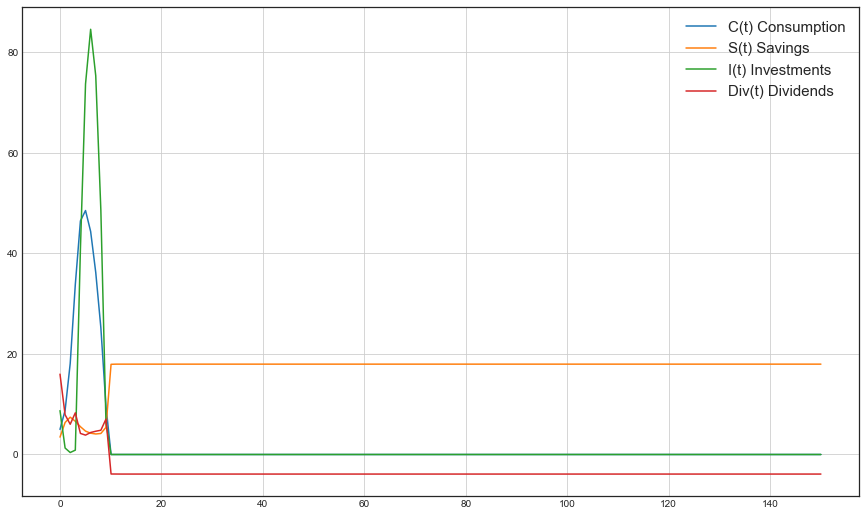

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


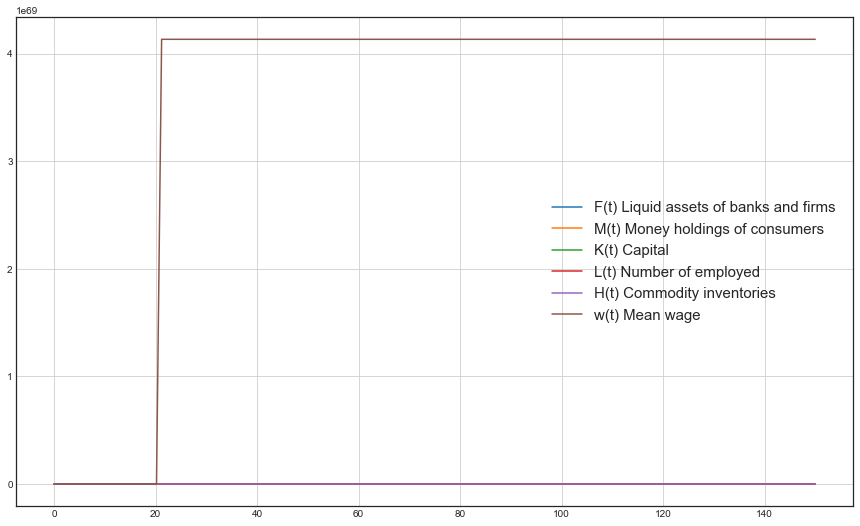

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


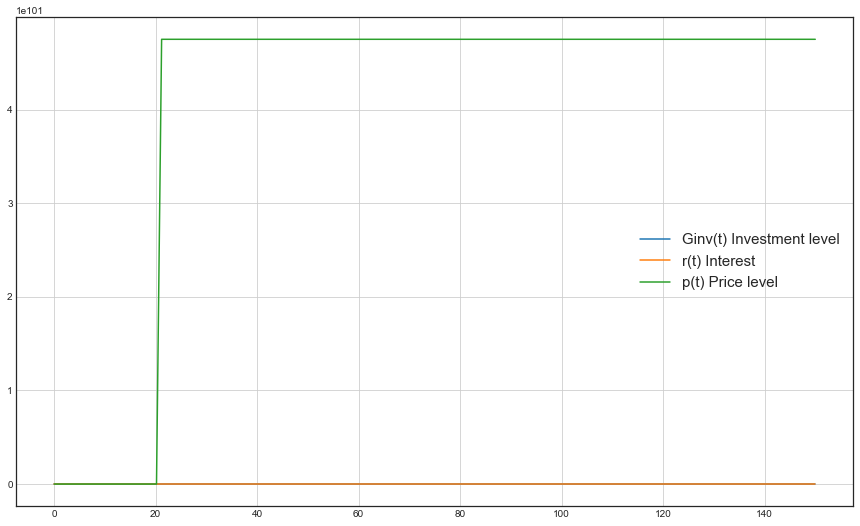

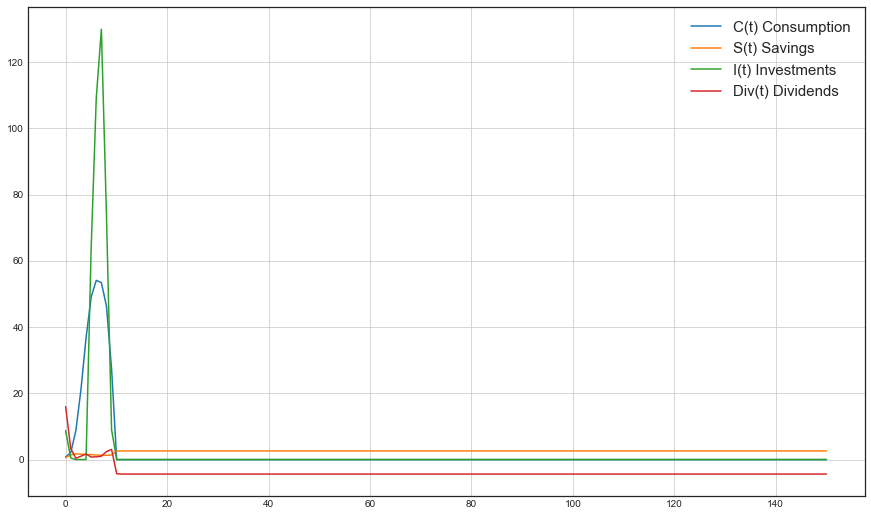

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


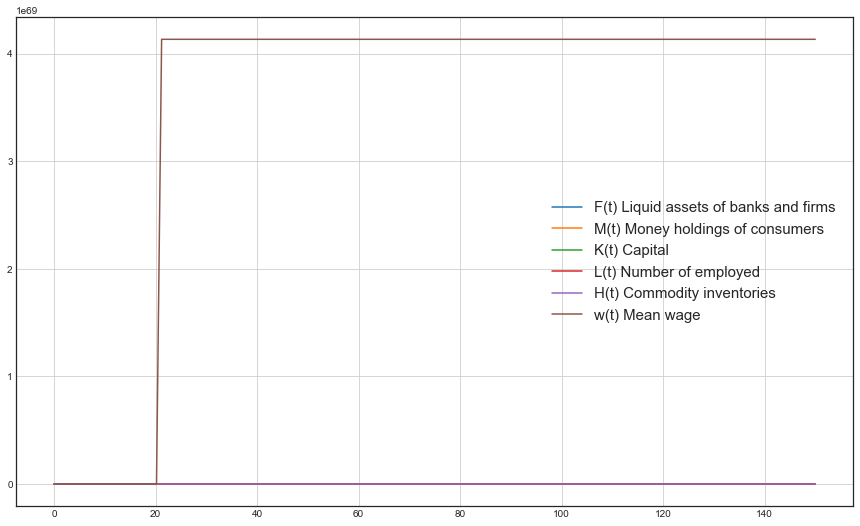

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


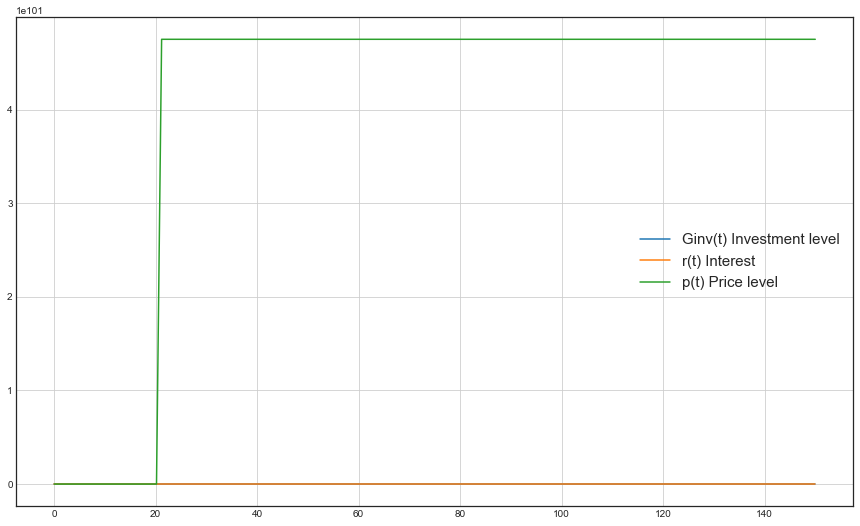

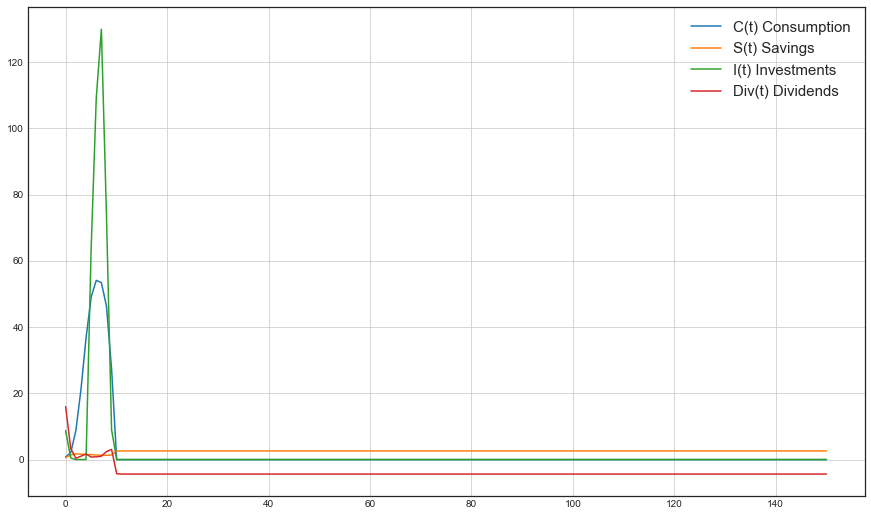

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


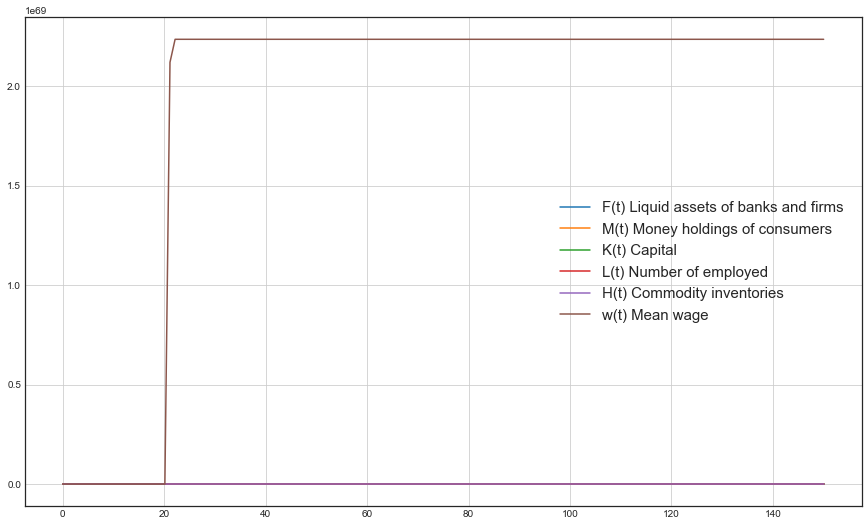

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


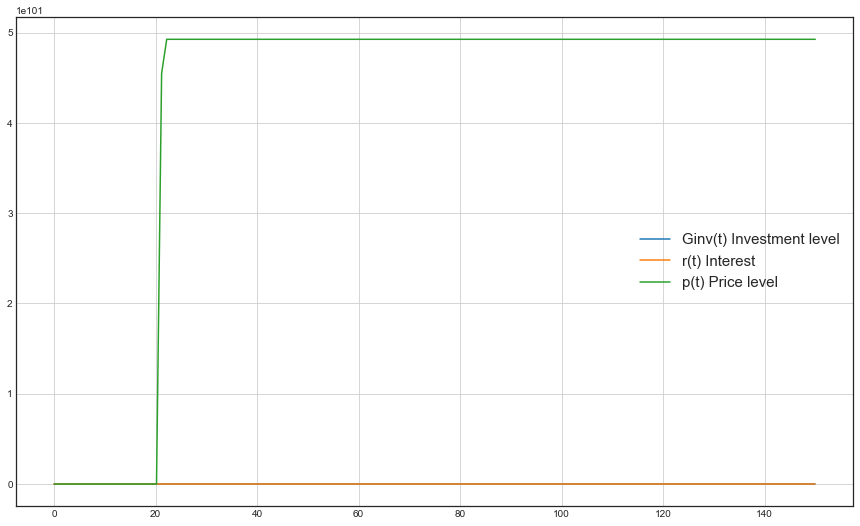

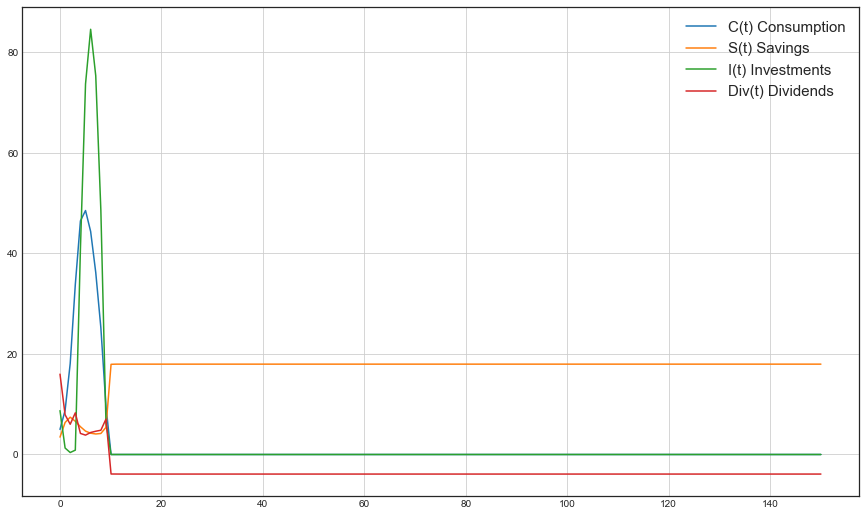

D:\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-7-264a00182560>:31: RuntimeWarning: overflow encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
<ipython-input-7-264a00182560>:31: RuntimeWarning: invalid value encountered in double_scalars
  Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok


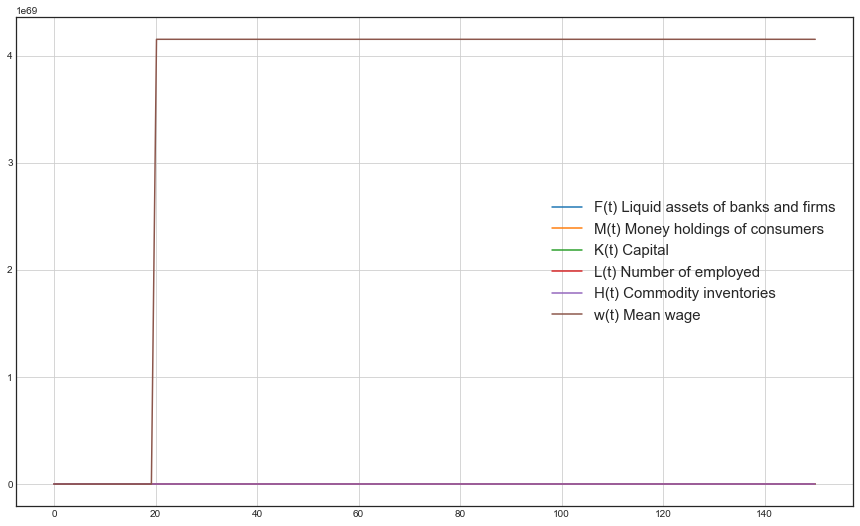

Investments are inversely related to interest.  They increase when interest is low, national income and savings  accordingly  grow,  and  interest  starts  decreasing  to  stimulate  the  transition  from    S    to   I.    Higher  interest  puts a brake on investment activity, which in turn leads to reduction of national income.  If the interest is set too high, money holders will purchase securities.  This leads to an increase in the demand for bonds and their prices rise.  When money supply exceeds the demand for money, the interest decreases.


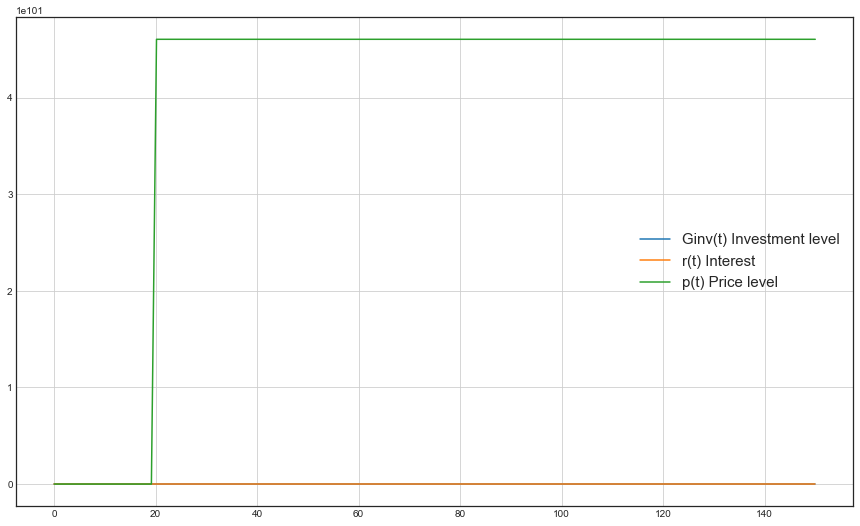

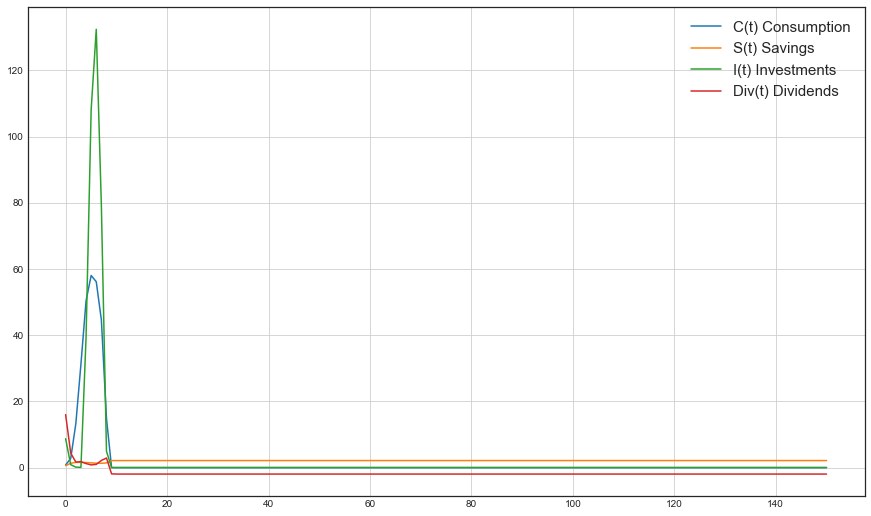

In [25]:
Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    Y[i] = main(95, 95, 82.635, 0.1, X[0], X[1], 0.8, 2, 0.1, 0.1, 9.3 * 0.03, 1, 0.3, 5, 0.8, 200)

In [15]:
95, 95, 82.635, 0.1, 0.036, 0.8, 0.8, 2 0.1, 0.1, 9.3 * 0.03, 1, 0.3, 5, 0.8, 200

SyntaxError: invalid syntax (<ipython-input-15-0ca09fb4d1e0>, line 1)

In [26]:
Si = sobol.analyze(problem, Y)

In [27]:
Si

{'S1': array([nan, nan]),
 'S1_conf': array([nan, nan]),
 'ST': array([nan, nan]),
 'ST_conf': array([nan, nan]),
 'S2': array([[nan, nan],
        [nan, nan]]),
 'S2_conf': array([[nan, nan],
        [nan, nan]])}